# Solutions

### Exercise 1: Generate the data using numpy

In [1]:
import numpy as np

In [2]:
salaries = np.random.randint(10000, 100000, size=100)
salaries, type(salaries)

(array([26048, 33735, 35411, 81090, 84607, 63707, 15533, 67224, 26193,
        69470, 60119, 66569, 72119, 27271, 84802, 98321, 68750, 17408,
        27669, 43127, 65895, 16652, 63570, 14305, 90514, 18966, 23556,
        48519, 32373, 95962, 89161, 75402, 63224, 99835, 50784, 63581,
        73372, 74893, 56944, 78979, 88664, 45765, 91705, 18913, 73814,
        15241, 15374, 62368, 10440, 97064, 17129, 53559, 40544, 82321,
        50015, 93626, 82226, 24266, 89534, 35294, 18584, 64590, 70702,
        86144, 33180, 61440, 34986, 94392, 57628, 23676, 50088, 51058,
        23290, 54727, 24138, 21829, 53136, 47667, 12324, 60736, 30304,
        33675, 92960, 22509, 31132, 98845, 28205, 48059, 82500, 71126,
        54391, 92303, 36222, 31620, 57983, 64710, 71865, 85804, 41308,
        38422]),
 numpy.ndarray)

In [3]:
salaries.ndim

1

In [4]:
salaries.shape

(100,)

### Exercise 5: Calculating statistics 
#### mean

In [6]:
sum(salaries) / len(salaries)

54117.8

In [7]:
np.mean(salaries) 

54117.8

#### median

First, we define a function to calculate the median:

In [11]:
import math

def find_median(x):
    x.sort()
    midpoint = (len(x) + 1) / 2 - 1 # subtract 1 bc index starts at 0
    if len(x) % 2:
        # x has odd number of values
        return x[int(midpoint)]
    else:
        return (x[math.floor(midpoint)] + x[math.ceil(midpoint)]) / 2

In [9]:
find_median(salaries)

59707.5

Then, we check its output matches the expected output:

In [12]:
np.median(salaries)

54559.0

In [13]:
np.quantile(salaries, 0.50)

54559.0

#### mode

In [14]:
from scipy import stats as st
print(st.mode(salaries, keepdims=False))

ModeResult(mode=10440, count=1)


In [15]:
from statistics import mode

mode(salaries)

26048

#### sample variance
Remember to use Bessel's correction.

In [16]:
np.var(salaries)

680015819.42

#### sample standard deviation
Remember to use Bessel's correction.

In [12]:
np.std(salaries)

26118.646725004724

#### coefficient of variation

In [13]:
np.std(salaries) / np.mean(salaries)

0.442494829810326

#### interquartile range
First, we define function to calculate a quantile:

In [14]:
import math

def quantile(x, pct):
    x.sort()
    index = (len(x) + 1) * pct - 1
    if len(x) % 2:
        # odd, so grab the value at index
        return x[int(index)]
    else:
        return (x[math.floor(index)] + x[math.ceil(index)]) / 2

we can calculate the IQR:

In [15]:
q3, q1 = quantile(salaries, 0.75), quantile(salaries, 0.25)
iqr = q3 - q1
iqr

42659.0

In [32]:
np.quantile(salaries, 0.75) - np.quantile(salaries, 0.25)

35139.0

#### quartile coefficent of dispersion

In [16]:
iqr / (q1 + q3)

0.3518151978491431

In [17]:
salaries = [250, 500, 100, 200, 200]
min_salary, max_salary = min(salaries), max(salaries)
salary_range = max_salary - min_salary

min_max_scaled = [(x - min_salary) / salary_range for x in salaries]
min_max_scaled

[0.375, 1.0, 0.0, 0.25, 0.25]

In [23]:
data = np.loadtxt('data/Salary_Data.csv', delimiter=',', skiprows=1)
data[:5], data.ndim

(array([[1.1000e+00, 3.9343e+04],
        [1.3000e+00, 4.6205e+04],
        [1.5000e+00, 3.7731e+04],
        [2.0000e+00, 4.3525e+04],
        [2.2000e+00, 3.9891e+04]]),
 2)

### Exercise 7: Scaling data
#### min-max scaling

In [24]:
normalizedData = (data-np.min(data))/(np.max(data)-np.min(data)) 
  
# normalized data using min max value 
print(normalizedData) 

[[0.00000000e+00 3.21447276e-01]
 [1.63412177e-06 3.77513994e-01]
 [3.26824354e-06 3.08276255e-01]
 [7.35354796e-06 3.55616762e-01]
 [8.98766973e-06 3.25924770e-01]
 [1.47070959e-05 4.62790639e-01]
 [1.55241568e-05 4.91453135e-01]
 [1.71582786e-05 4.44839811e-01]
 [1.71582786e-05 5.26545900e-01]
 [2.12435830e-05 4.67259962e-01]
 [2.28777048e-05 5.16520563e-01]
 [2.36947657e-05 4.55861962e-01]
 [2.36947657e-05 4.65364381e-01]
 [2.45118265e-05 4.66377536e-01]
 [2.77800701e-05 4.99305090e-01]
 [3.10483136e-05 5.55085836e-01]
 [3.26824354e-05 5.39488144e-01]
 [3.43165572e-05 6.78870560e-01]
 [3.92189225e-05 6.64776260e-01]
 [4.00359834e-05 7.67538008e-01]
 [4.65724704e-05 7.49546327e-01]
 [4.90236531e-05 8.02941256e-01]
 [5.55601402e-05 8.27690030e-01]
 [5.80113228e-05 9.29904347e-01]
 [6.20966273e-05 8.94108909e-01]
 [6.45478099e-05 8.62660236e-01]
 [6.86331143e-05 9.55698959e-01]
 [6.94501752e-05 9.20287540e-01]
 [7.51696014e-05 1.00000000e+00]
 [7.68037232e-05 9.95759454e-01]]


In [25]:
normalizedData = data/np.linalg.norm(data) 
  
# normalized data using linalg.norm 
print(normalizedData) 

[[2.49044338e-06 8.90741037e-02]
 [2.94325127e-06 1.04609942e-01]
 [3.39605916e-06 8.54244721e-02]
 [4.52807888e-06 9.85423166e-02]
 [4.98088677e-06 9.03147973e-02]
 [6.56571438e-06 1.28239722e-01]
 [6.79211832e-06 1.36181972e-01]
 [7.24492621e-06 1.23265627e-01]
 [7.24492621e-06 1.45906022e-01]
 [8.37694593e-06 1.29478152e-01]
 [8.82975382e-06 1.43128045e-01]
 [9.05615776e-06 1.26319817e-01]
 [9.05615776e-06 1.28952894e-01]
 [9.28256170e-06 1.29233635e-01]
 [1.01881775e-05 1.38357714e-01]
 [1.10937933e-05 1.53814311e-01]
 [1.15466011e-05 1.49492260e-01]
 [1.19994090e-05 1.88114509e-01]
 [1.33578327e-05 1.84209041e-01]
 [1.35842366e-05 2.12683865e-01]
 [1.53954682e-05 2.07698450e-01]
 [1.60746800e-05 2.22493948e-01]
 [1.78859116e-05 2.29351723e-01]
 [1.85651234e-05 2.57674857e-01]
 [1.96971431e-05 2.47756100e-01]
 [2.03763550e-05 2.39041812e-01]
 [2.15083747e-05 2.64822429e-01]
 [2.17347786e-05 2.55010082e-01]
 [2.33196062e-05 2.77098051e-01]
 [2.37724141e-05 2.75923015e-01]]


In [26]:
from sklearn import preprocessing as p 
  
min_max_scaler = p.MinMaxScaler() 
normalizedData = min_max_scaler.fit_transform(data) 
  
# normalized data using MinMaxScaler 
print(normalizedData) 

[[0.         0.01904087]
 [0.0212766  0.1000945 ]
 [0.04255319 0.        ]
 [0.09574468 0.06843846]
 [0.11702128 0.02551382]
 [0.19148936 0.22337586]
 [0.20212766 0.26481219]
 [0.22340426 0.19742499]
 [0.22340426 0.31554453]
 [0.27659574 0.229837  ]
 [0.29787234 0.30105126]
 [0.30851064 0.21335932]
 [0.30851064 0.22709662]
 [0.31914894 0.2285613 ]
 [0.36170213 0.27616348]
 [0.40425532 0.35680369]
 [0.42553191 0.33425467]
 [0.44680851 0.53575478]
 [0.5106383  0.51537916]
 [0.5212766  0.66393811]
 [0.60638298 0.63792818]
 [0.63829787 0.7151193 ]
 [0.72340426 0.75089771]
 [0.75531915 0.89866525]
 [0.80851064 0.84691708]
 [0.84042553 0.80145287]
 [0.89361702 0.93595559]
 [0.90425532 0.88476258]
 [0.9787234  1.        ]
 [1.         0.9938696 ]]


### Exercise 8: Calculating covariance and correlation
#### covariance

In [27]:
np.cov(data[:,0], data[:,1])

array([[8.05360920e+00, 7.61063034e+04],
       [7.61063034e+04, 7.51550960e+08]])

#### Pearson correlation coefficient ($\rho$)

In [28]:
np.corrcoef(data[:,0], data[:,1])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

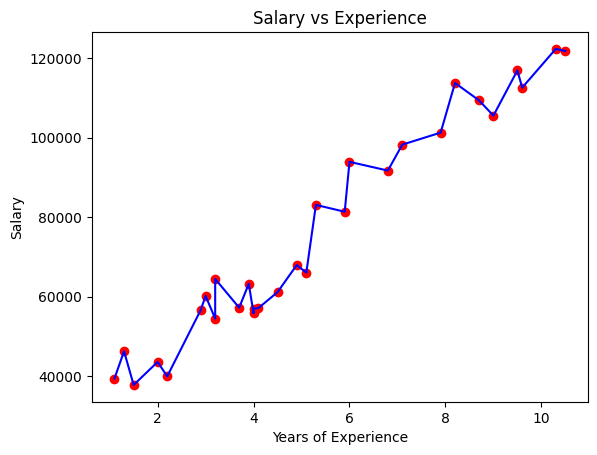

In [32]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], color = 'red')
plt.plot(data[:,0], data[:,1], color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

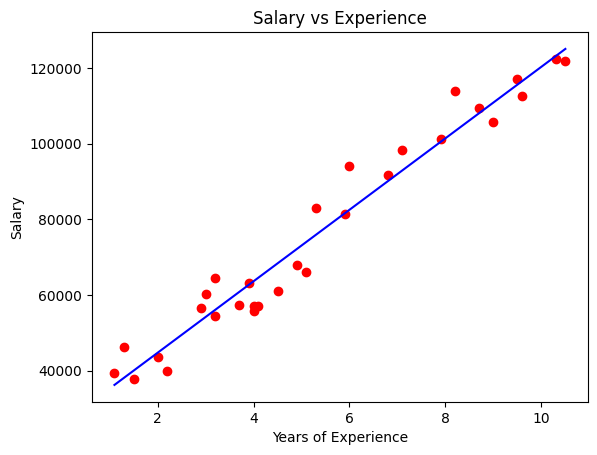

In [33]:
x = data[:,0]
y = data[:,1]

coef = np.polyfit(x,y,1)
linearRegression = np.poly1d(coef) 
# linearRegression is now a function which takes in x and returns an estimate for y using the higher-order equivalents


plt.scatter(x, y, color = 'red')
plt.plot(x, linearRegression(x), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [34]:
linearRegression(12.3)

142026.73675256618

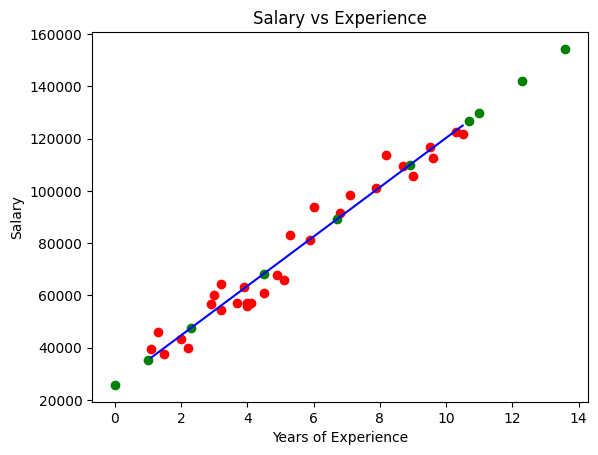

In [35]:
x_test = [0, 1.0, 2.3, 4.5, 6.7,8.9, 10.7, 11.0, 12.3, 13.6] 
y_pred = linearRegression(x_test)
plt.scatter(x, y, color = 'red')
plt.plot(x, linearRegression(x), color = 'blue')
plt.scatter(x_test, y_pred, color = 'green')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

<hr>
<div>
    <a href="../../ch_01/introduction_to_data_analysis.ipynb">
        <button>&#8592; Introduction to Data Analysis</button>
    </a>
    <a href="../../ch_01/python_101.ipynb">
        <button>Python 101</button>
    </a>
    <a href="../../ch_02/1-pandas_data_structures.ipynb">
        <button style="float: right;">Chapter 2 &#8594;</button>
    </a>
</div>
<hr>